In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('spam.csv',encoding='latin-1' )

# Show the first few rows
print(df.head())

# Check the shape and column names
print("\nShape:", df.shape)
print("\nColumns:", df.columns)

# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

# Check class distribution
print("\nClass distribution:\n", df['label'].value_counts())

# Optional: Check for missing values
print("\nMissing values:\n", df.isnull().sum())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Shape: (5572, 5)

Columns: Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64

Missing values:
 label      0
message    0
dtype: int64


In [2]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Step 1: Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 2: Preprocess text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    # Join back into a single string
    return ' '.join(words)

# Apply the preprocessing
df['clean_message'] = df['message'].apply(preprocess_text)

# Preview the result
print(df[['message', 'clean_message']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vighn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the clean messages
X = vectorizer.fit_transform(df['clean_message'])

# Target labels
y = df['label'].values

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (5572, 8389)


In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (4457, 8389)
Test set size: (1115, 8389)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# Make predictions
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.947085201793722

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.63      0.76       150

    accuracy                           0.95      1115
   macro avg       0.95      0.81      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [8]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.967713004484305

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [9]:
import joblib

# Save the model
joblib.dump(nb_model, 'spam_classifier_nb_model.pkl')

# Save the vectorizer too
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

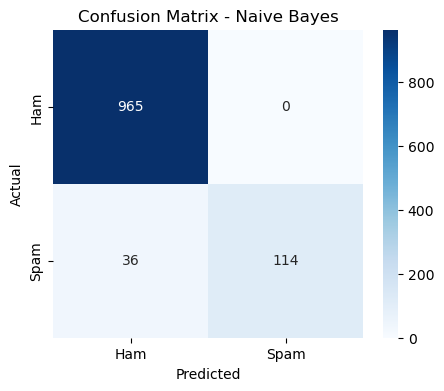

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, nb_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
